# Import Libraries

In [118]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Read data

In [119]:
df_train = pd.read_csv('clean data/train.csv')
df_val = pd.read_csv('clean data/val.csv')
df_test = pd.read_csv('clean data/test.csv')

In [120]:
X_train = df_train.drop(columns='price', axis=0).to_numpy()
y_train = df_train['price'].to_numpy()

X_val = df_val.drop(columns='price', axis=0).to_numpy()
y_val = df_val['price'].to_numpy()

X_test = df_test.drop(columns='price', axis=0).to_numpy()
y_test = df_test['price'].to_numpy()

In [121]:
input_dim = X_train.shape[1]
output_dim = 1

# Training

In [122]:
model_checkpoint = ModelCheckpoint(
    filepath = "Model/mlp.h5",
    save_best_only=True)

early_stopping = EarlyStopping(
    patience=5,
    restore_best_weights=True)

reduce_lr_on_plateau = ReduceLROnPlateau(
    verbose = 1,
    factor=0.1,
    patience=2) 

In [123]:
model = Sequential()
model.add(Dense(units=input_dim, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=output_dim))

In [124]:
# compile network
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mse'])
# fit network
history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_val, y_val), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr_on_plateau])

Epoch 1/200
368/368 [==============================] - 2s 3ms/step - loss: 20.6920 - mse: 20.6920 - val_loss: 13.6442 - val_mse: 13.6442
Epoch 2/200
368/368 [==============================] - 1s 2ms/step - loss: 11.2884 - mse: 11.2884 - val_loss: 10.7877 - val_mse: 10.7877
Epoch 3/200
368/368 [==============================] - 1s 2ms/step - loss: 10.0823 - mse: 10.0823 - val_loss: 10.4295 - val_mse: 10.4295
Epoch 4/200
368/368 [==============================] - 1s 2ms/step - loss: 9.9709 - mse: 9.9709 - val_loss: 10.4001 - val_mse: 10.4001
Epoch 5/200
368/368 [==============================] - 1s 3ms/step - loss: 9.9609 - mse: 9.9609 - val_loss: 10.3865 - val_mse: 10.3865
Epoch 6/200
368/368 [==============================] - 1s 3ms/step - loss: 9.9224 - mse: 9.9224 - val_loss: 10.2719 - val_mse: 10.2719
Epoch 7/200
368/368 [==============================] - 1s 2ms/step - loss: 9.3667 - mse: 9.3667 - val_loss: 8.8945 - val_mse: 8.8945
Epoch 8/200
368/368 [==============================

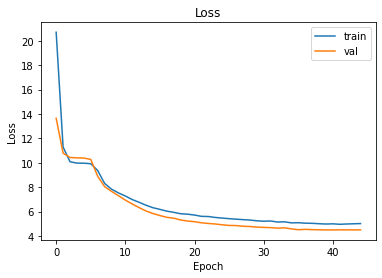

In [125]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Result

In [126]:
y_pred = model.predict(X_test)
y_pred = np.reshape(y_pred, y_pred.shape[0])

In [127]:
# y_pred = np.power(np.e, y_pred) - 1
# y_test = np.power(np.e, y_test) - 1

In [128]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)
print('R2:', r2)

MAE: 1.5370472667194117
RMSE: 2.126161860880468
MAPE: 0.31723258643029323
R2: 0.5606954164312585


In [129]:
def plot_evaluate(y_true, y_pred):
    plt.plot(y_true, y_pred, 'b.')
    x = [np.min(y_true), np.max(y_true)]
    y = x
    plt.plot(x, y, 'r')
    plt.title('MLP')
    plt.xlabel('Reality')
    plt.ylabel('Predict')
    plt.show()

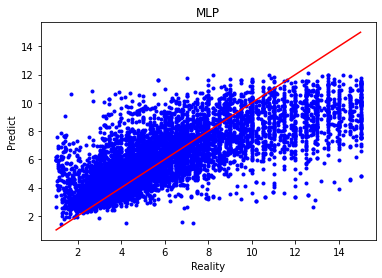

In [130]:
plot_evaluate(y_test, y_pred)